Problem Statement
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.
The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:
 
•	Historical data of demand for a product-center combination (Weeks: 1 to 145)
•	Product(Meal) features such as category, sub-category, current price and discount
•	Information for fulfillment center like center area, city information etc.
 
Data Dictionary
 
1.	Weekly Demand data (train.csv): Contains the historical demand data for all centers, test.csv contains all the following features except the target variable
 
Variable	Definition
id	Unique ID
week	Week No
center_id	Unique ID for fulfillment center
meal_id	Unique ID for Meal
checkout_price	Final price including discount, taxes & delivery charges
base_price	Base price of the meal
emailer_for_promotion	Emailer sent for promotion of meal
homepage_featured	Meal featured at homepage
num_orders	(Target) Orders Count
 
 
2.	fulfilment_center_info.csv: Contains information for each fulfilment center
 
Variable	Definition
center_id	Unique ID for fulfillment center
city_code	Unique code for city
region_code	Unique code for region
center_type	Anonymized center type
op_area	Area of operation (in km^2)
 
3.	meal_info.csv: Contains information for each meal being served
 
Variable	Definition
meal_id	Unique ID for the meal
category	Type of meal (beverages/snacks/soups….)
cuisine	Meal cuisine (Indian/Italian/…)
 
Evaluation Metric
The evaluation metric for this competition is 100*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error across all entries in the test set.
Public and Private Split
Test data is further randomly divided into Public (30%) and Private (70%) data.
•	Your initial responses will be checked and scored on the Public data.
•	The final rankings would be based on your private score which will be published once the competition is over.
 

In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Meal data/"

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [3]:
df1 = pd.read_csv(your_local_path+"train.csv")

In [4]:
df2 = pd.read_csv(your_local_path+"fulfilment_center_info.csv")

In [5]:
df3 = pd.read_csv(your_local_path+"meal_info.csv")

In [6]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50


In [7]:
df1.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [8]:
df1_merged = pd.merge(df1,df2,left_on='center_id',right_on='center_id',how='inner')

In [9]:
df1_merged = pd.merge(df1_merged,df3,left_on='meal_id',right_on='meal_id',how='inner')

In [10]:
df1_merged.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [11]:
list(df1_merged)

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine']

In [12]:
df2_merged=df1_merged.copy()

In [13]:
df2_merged["center_type"].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [14]:
df2_merged["category"].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [15]:
df2_merged["cuisine"].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [17]:
lb_make = preprocessing.LabelEncoder()
df1_merged['cuisine_code']=lb_make.fit_transform(df1_merged['cuisine'])
df1_merged['center_type_code']=lb_make.fit_transform(df1_merged['center_type'])

In [20]:
#enc.fit(df1_merged['center_type'])
df1_merged=pd.get_dummies(df1_merged,columns=['category'],prefix=['category'], drop_first=True)

In [21]:
df1_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 29 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
cuisine                  456548 non-null object
cuisine_code             456548 non-null int32
center_type_code         456548 non-null int32
category_Biryani         456548 non-null uint8
category_Desert          456548 non-null uint8
category_Extras          456548 non

In [22]:
df1_merged.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,0,0
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,0,0,0,0
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,0,0,0,0
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,0,0,0,0
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,0,0,0,0


In [23]:
list(df1_merged)

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'cuisine',
 'cuisine_code',
 'center_type_code',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters']

In [24]:
columns=['week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'op_area',
 'cuisine_code',
 'center_type_code',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters']
features_1 = df1_merged[list(columns)].values

In [25]:
features_1.shape

(456548, 23)

In [26]:
columns1 = ['num_orders']
target=df1_merged[list(columns1)].values

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(features_1,target, random_state=1, test_size=0.2)

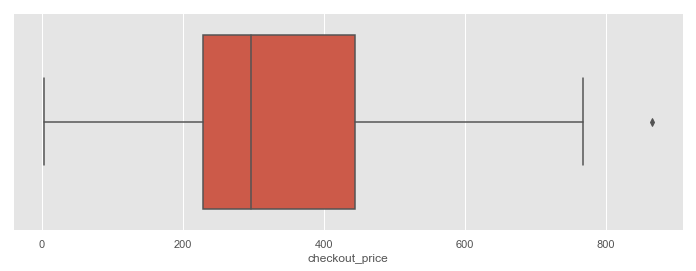

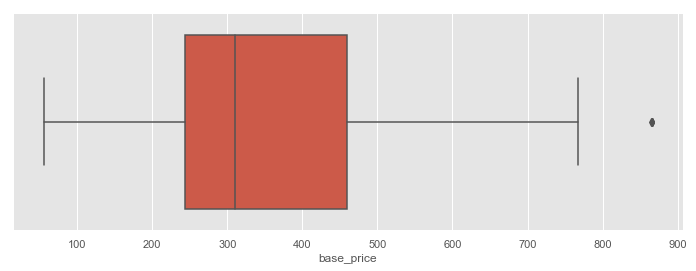

In [27]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.boxplot(x='checkout_price',data=df1_merged)
plt.figure(figsize=(12,4))
sns.boxplot(x='base_price',data=df1_merged)

In [29]:
tt=[]
ti=[]
for i in df2_merged["category"].unique():
    df_cat=(df2_merged.loc[df2_merged["category"]==i,'num_orders']).count()
    tt.append(df_cat)
    ti.append(i)
    
print(tt) 
print(ti)

ttdf=pd.DataFrame({"order_count":tt,"cat":ti})
ttdf=ttdf.sort_values(["order_count"]).reset_index(drop=True)
print(ttdf)

[127890, 33408, 29941, 27694, 33291, 20614, 13562, 33138, 26916, 29379, 29294, 28559, 10187, 12675]
['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich', 'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert', 'Salad', 'Fish', 'Soup']
    order_count           cat
0         10187          Fish
1         12675          Soup
2         13562        Extras
3         20614       Biryani
4         26916       Seafood
5         27694         Pasta
6         28559         Salad
7         29294        Desert
8         29379  Other Snacks
9         29941      Starters
10        33138         Pizza
11        33291      Sandwich
12        33408     Rice Bowl
13       127890     Beverages


Text(0.5, 0, 'Category')

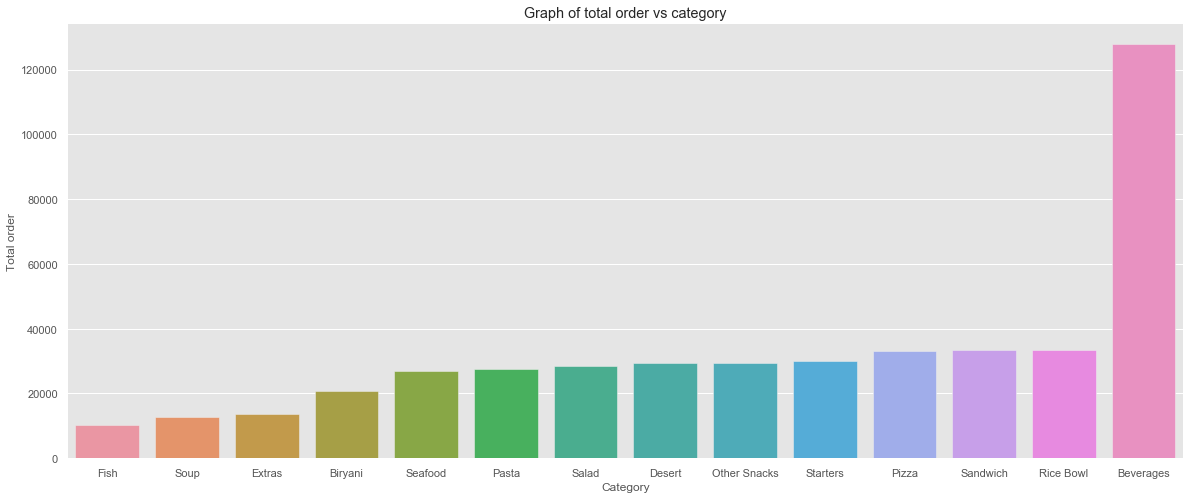

In [30]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x=ttdf["cat"],y=ttdf["order_count"])
ax.set_title('Graph of total order vs category')
ax.set_ylabel('Total order')
ax.set_xlabel('Category')

In [31]:
#Maximum and Minimum checkout price values

print(df1_merged.loc[df1_merged["checkout_price"].idxmin()])
print()
print(df1_merged.loc[df1_merged["checkout_price"].idxmax()])

id                           1300283
week                              38
center_id                         73
meal_id                         1230
checkout_price                  2.97
base_price                    316.25
emailer_for_promotion              0
homepage_featured                  0
num_orders                        14
city_code                        576
region_code                       34
center_type                   TYPE_A
op_area                            4
cuisine                  Continental
cuisine_code                       0
center_type_code                   0
category_Biryani                   0
category_Desert                    0
category_Extras                    0
category_Fish                      0
category_Other Snacks              0
category_Pasta                     0
category_Pizza                     0
category_Rice Bowl                 0
category_Salad                     0
category_Sandwich                  0
category_Seafood                   0
c

In [40]:
my_tree_one=tree.DecisionTreeRegressor(criterion='mse',max_depth=3)
my_tree_one=my_tree_one.fit(X_train,Y_train)
my_tree_one

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
pred=my_tree_one.predict(X_test)
pred

array([261.32294861, 261.32294861, 314.98613607, ..., 261.32294861,
       261.32294861, 261.32294861])

In [43]:
# the Feature_importances_attribute make it simple to interpret the significance of the predictors you include
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_1,target))
list(zip(columns,my_tree_one.feature_importances_))


[0.         0.37999679 0.         0.         0.31472512 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.30527809
 0.         0.         0.         0.         0.        ]
0.27473650843439723


[('week', 0.0),
 ('checkout_price', 0.3799967912487949),
 ('base_price', 0.0),
 ('emailer_for_promotion', 0.0),
 ('homepage_featured', 0.31472512012811454),
 ('city_code', 0.0),
 ('region_code', 0.0),
 ('op_area', 0.0),
 ('cuisine_code', 0.0),
 ('center_type_code', 0.0),
 ('category_Biryani', 0.0),
 ('category_Desert', 0.0),
 ('category_Extras', 0.0),
 ('category_Fish', 0.0),
 ('category_Other Snacks', 0.0),
 ('category_Pasta', 0.0),
 ('category_Pizza', 0.0),
 ('category_Rice Bowl', 0.30527808862309064),
 ('category_Salad', 0.0),
 ('category_Sandwich', 0.0),
 ('category_Seafood', 0.0),
 ('category_Soup', 0.0),
 ('category_Starters', 0.0)]

In [34]:
df4=pd.read_csv(your_local_path+"test_QoiMO9B.csv")
df4.head()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [ ]:
df4_merged=pd.merge(df4,df2,left_on='center_id',right_on='center_id',how='inner')
df4_merged=pd.merge(df4_merged,df2,left_on='meal_id',right_on='meal_id',how='inner')

In [ ]:
df4_merged.info()

In [ ]:
columns_test=[]
features_test=df4_merged[list(columns_test)].values
features_test

In [35]:
pred=my_tree_one.predict(features_test)
pred

NameError: name 'features_test' is not defined

In [ ]:
pred.shape

In [ ]:
pred=my_tree_one.predict(features_1)
df_mse=metrics.mean_absolute_error(target,pred)
df_mse